# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

#### A. Load Data

In [5]:
import pandas as pd
df_wholesale= pd.read_csv('/Users/tinapham/Desktop/lighthouse-data-notes/ProJect/LHL_UnsupervisedLearning_MLProject/Data/Wholesale_Data.csv')

#### B. EDA

In [6]:
df_wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
df_wholesale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
df_wholesale.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


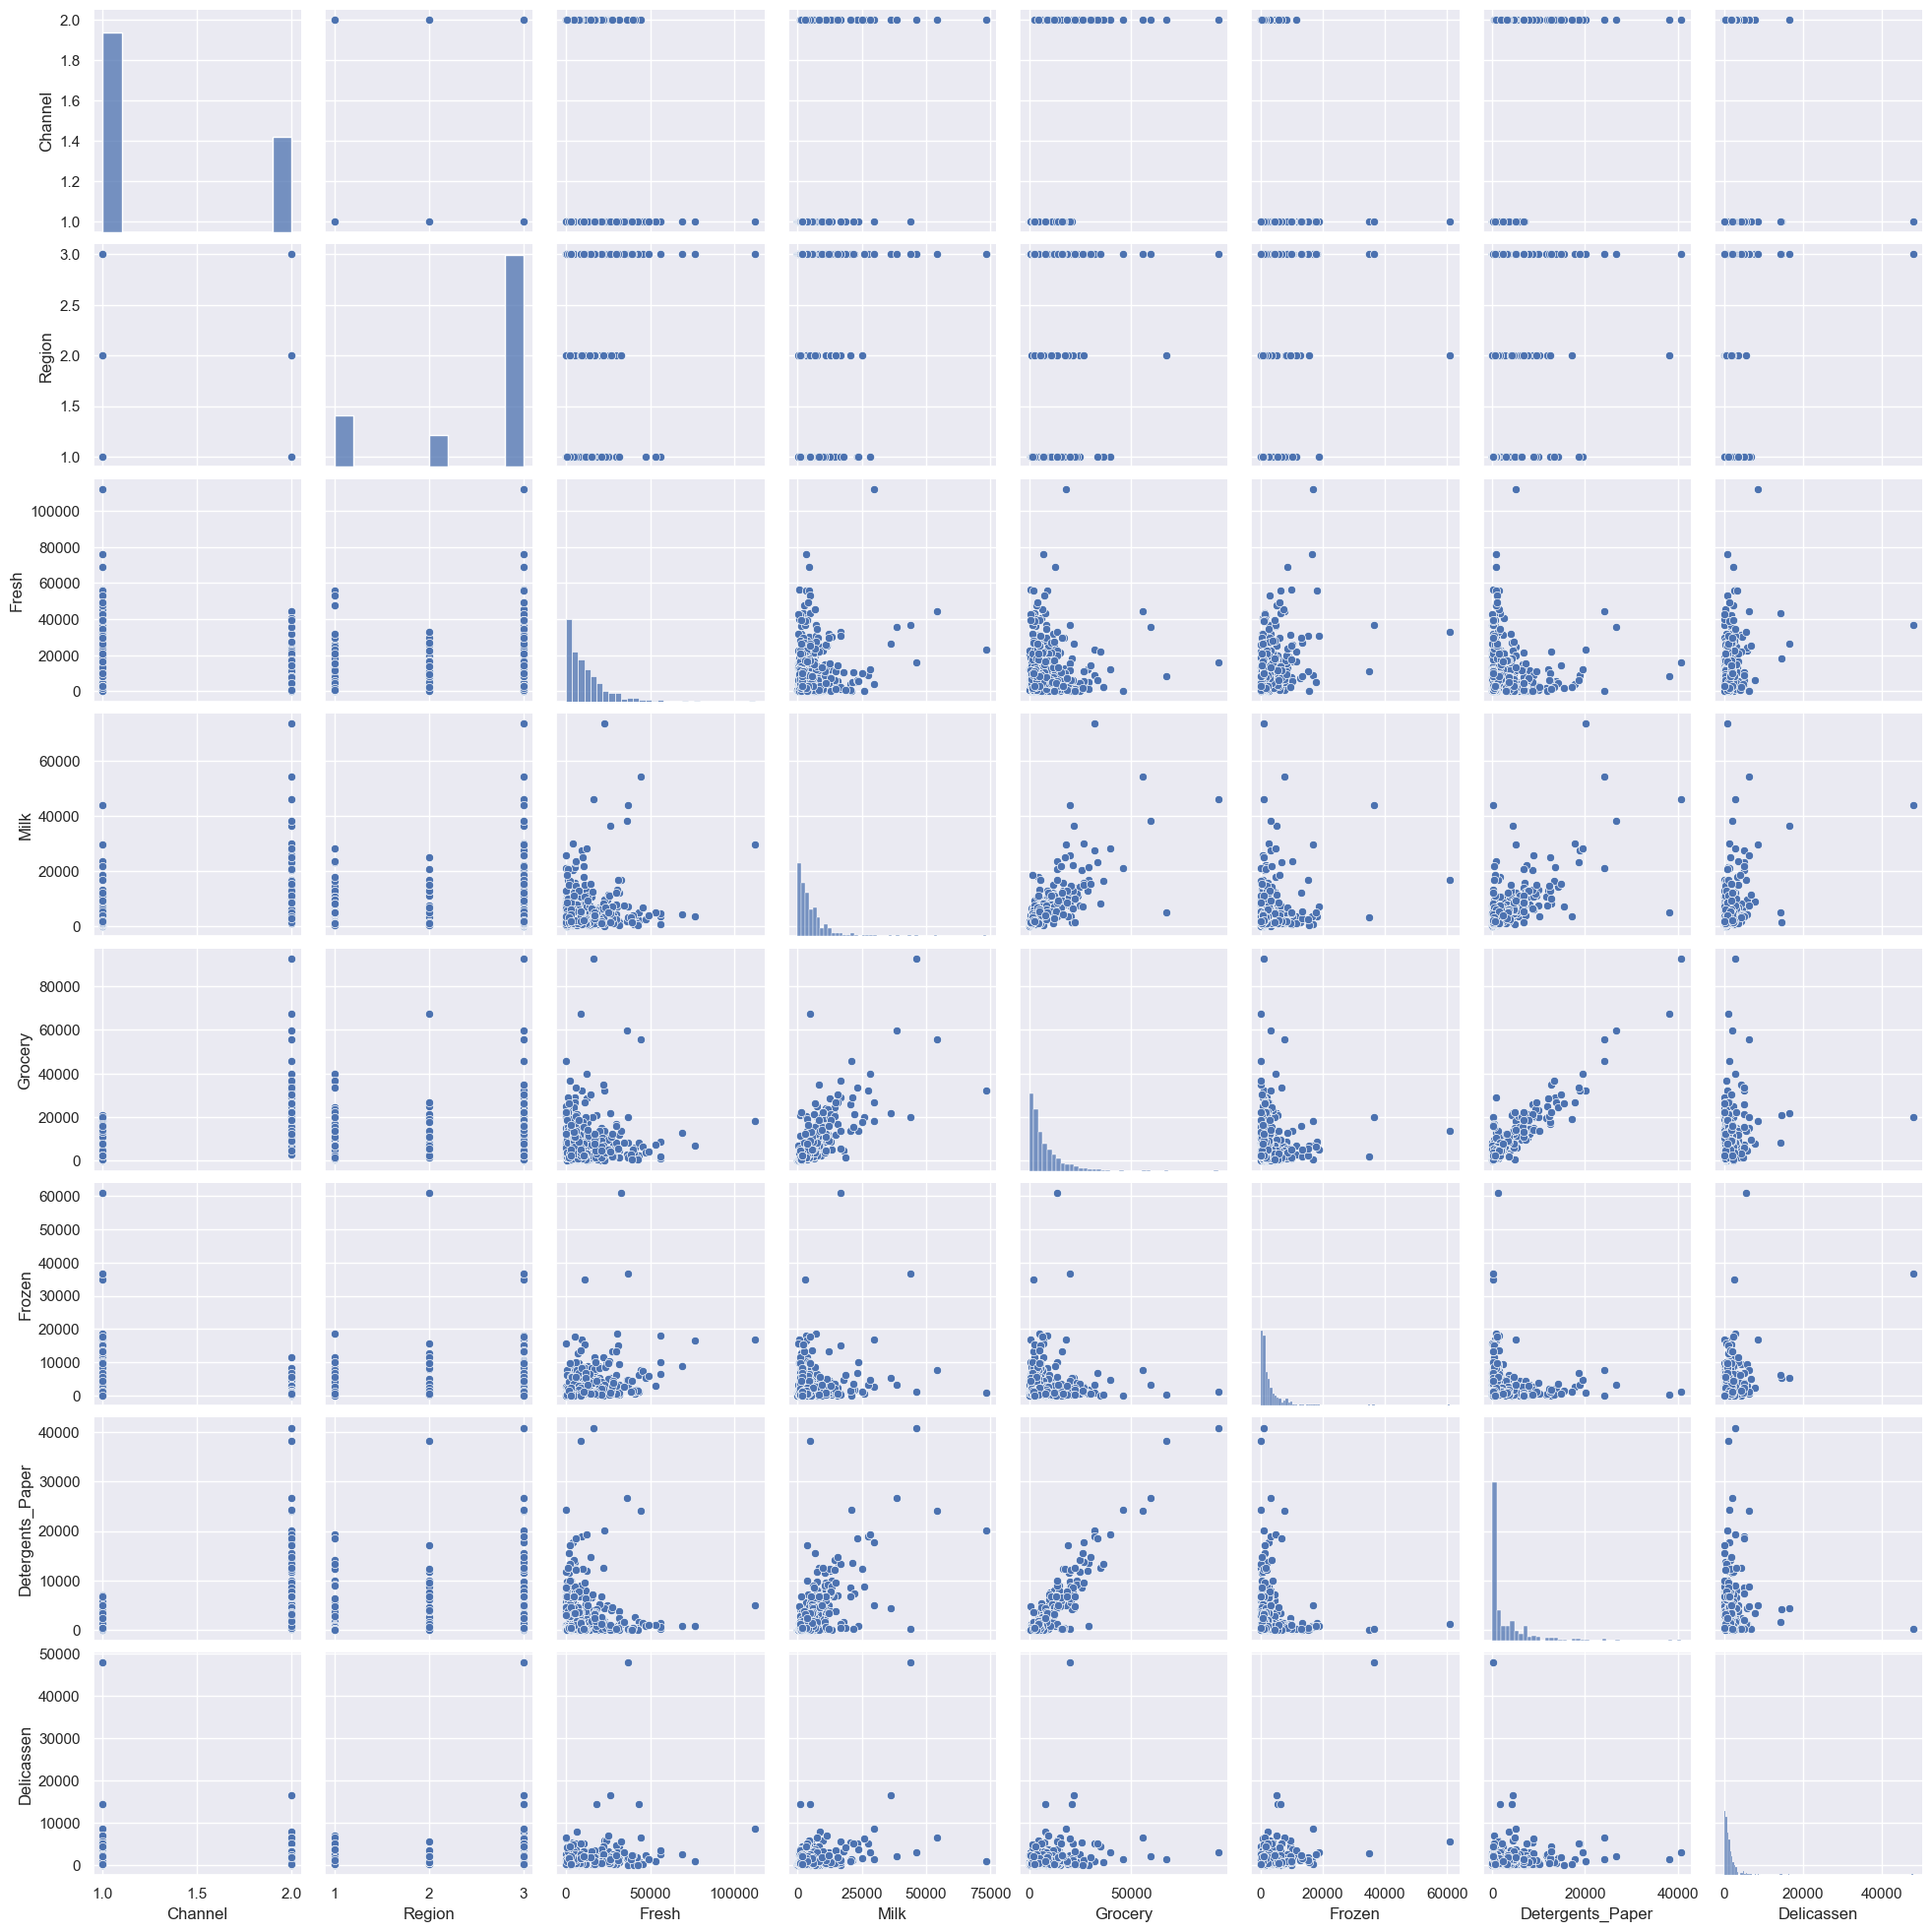

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', palette='deep')
sns.pairplot(data=df_wholesale,
            diag_kind='hist'
            )

plt.show()

- Outlier detect in the dataset--> perform log transform the data to reduce the effect of outlier
- Dropping df['Channel'] and df['Region']--> discrete data compare to the continuous data like the other data --> simplified the model

### C. Feature Engineering

In [10]:
# Dropping Channel and region
df_mod = df_wholesale.drop(['Channel','Region'], axis=1)

In [11]:
# Correllation between each feature
correlation= df_mod.corr()
print("The correlation between 'Grocery' and 'Detergents_Paper':", df_mod['Grocery'].corr(df_mod['Detergents_Paper']))

The correlation between 'Grocery' and 'Detergents_Paper': 0.9246406908542681


<AxesSubplot:>

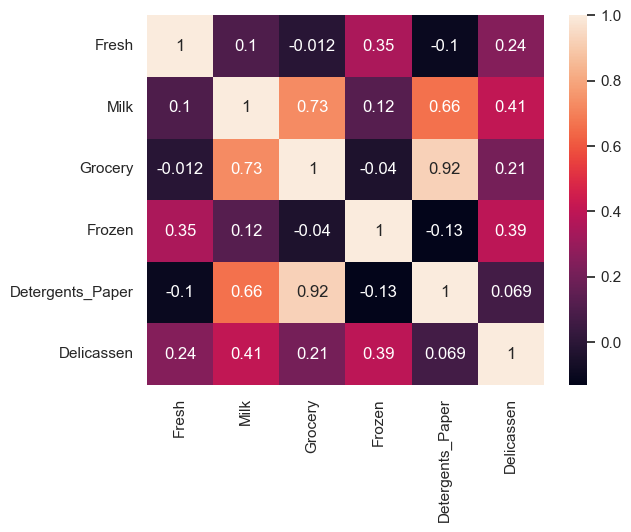

In [12]:
sns.heatmap(correlation, annot=True)

In [13]:
df_mod.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


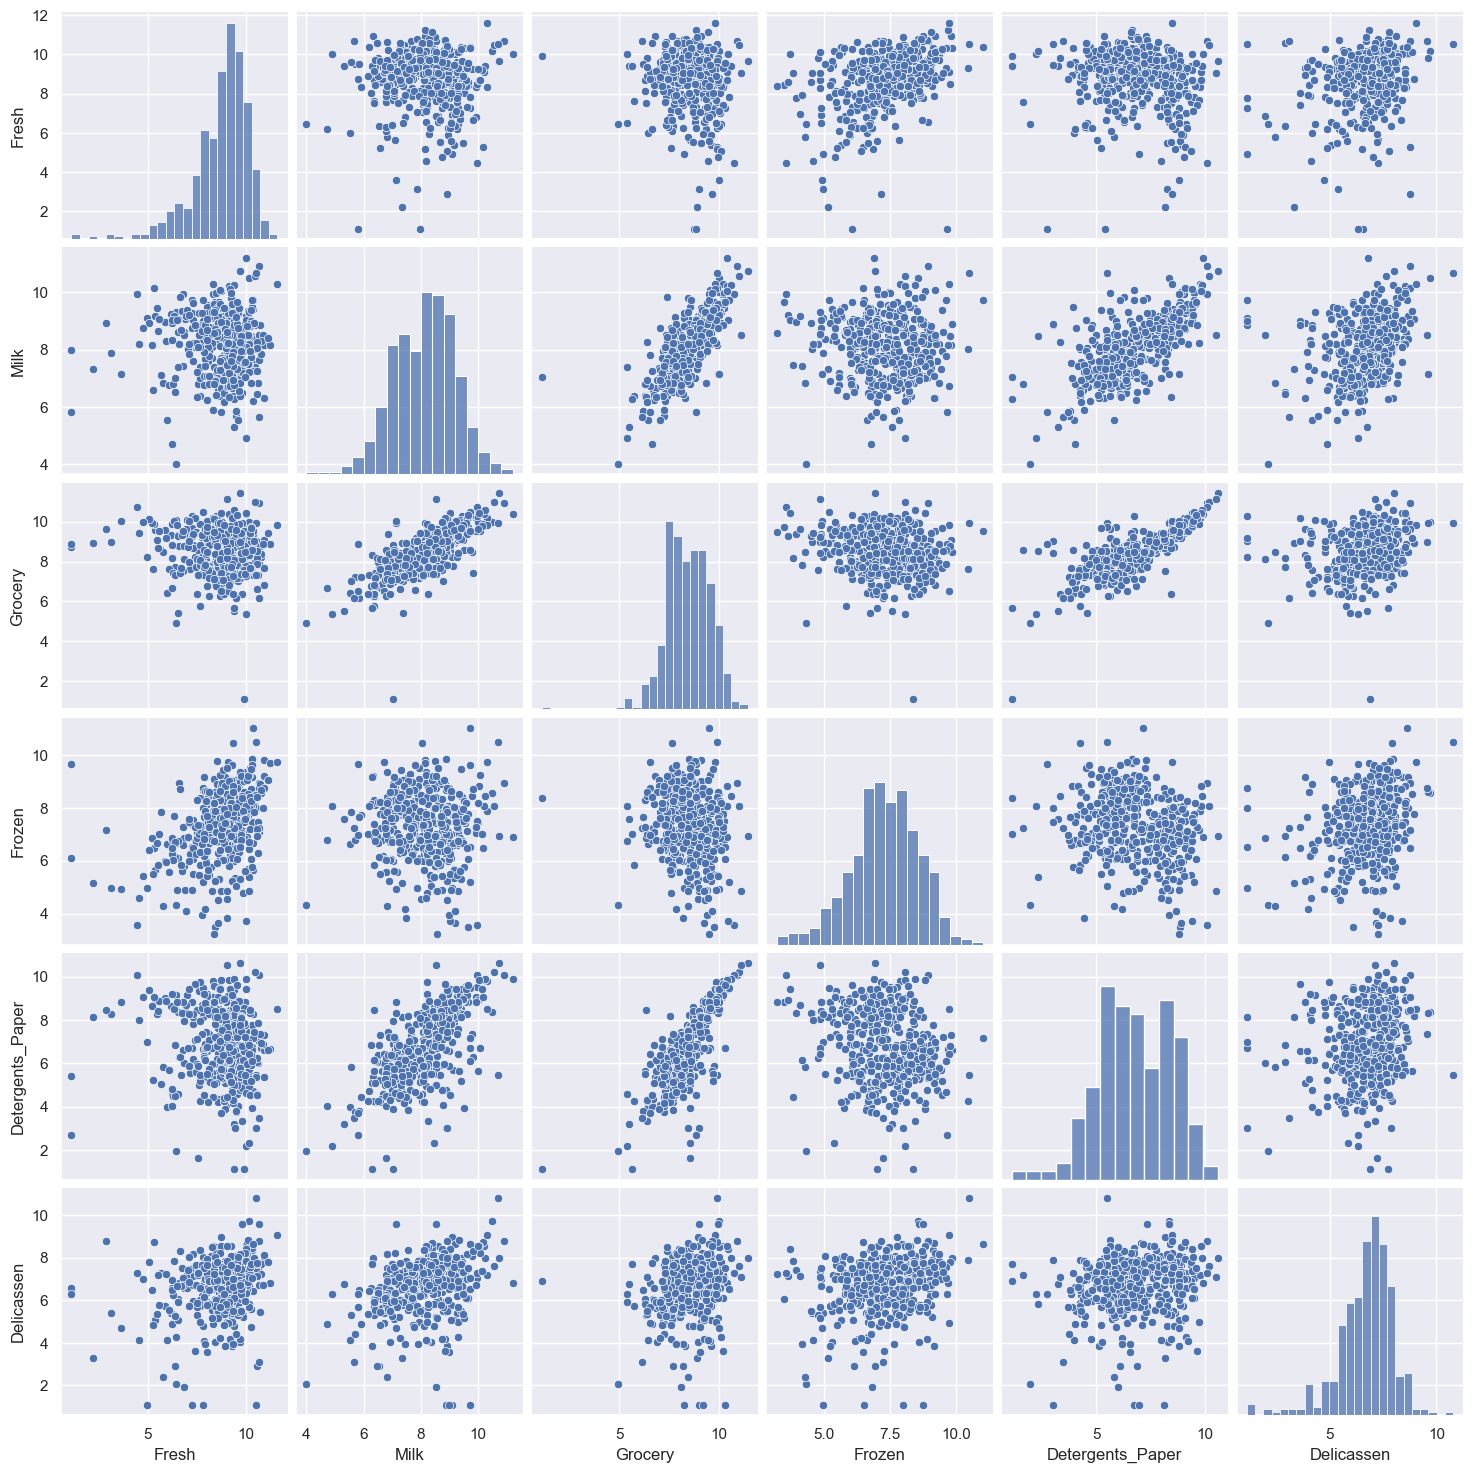

In [14]:
import numpy as np
# Scale the data using the natural logarithm
df_log = np.log(df_mod)


# Produce a scatter matrix for each pair of newly-transformed features
sns.set_theme(style='darkgrid', palette='deep')
sns.pairplot(data=df_log,
            diag_kind='hist'
            )

plt.show()

- Highest sale on freshness follow by Grocery
- Lowest sale on delicassen

In [15]:
# Create Random forest to examine lowest sale features: Delicassen
X_rfc= df_log.drop(columns='Delicassen')
y_rfc= df_log['Delicassen']


In [16]:
# Split the data into training and testing sets(0.25) using the given feature as the target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rfc, y_rfc, test_size=0.20, random_state=50)

# Create random forest regressor and fit it to the training set
from sklearn.ensemble import RandomForestRegressor
rfr =  RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)

# Report the score of the prediction using the testing set
score = rfr.score(X_test, y_test)
print(score)

0.2003338096109032


- Small negative corellation between Delicassen and the data set --> potential irrelevant features of the dataset
- Dropping to increase robust for clustering models

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [17]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import warnings 
warnings.filterwarnings('ignore')

In [18]:
# Dropping Delicassen from feature selection
#X_cluster= df_mod.drop(columns='Delicassen')
#y_cluster= df_mod['Delicassen']

In [19]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_std= scaler.fit_transform(df_log)

In [20]:
# Dimentional reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_std)

### Elbow Method
- Optimal number of cluster

Text(0.5, 1.0, 'Elbow Plot for K-Means Clustering')

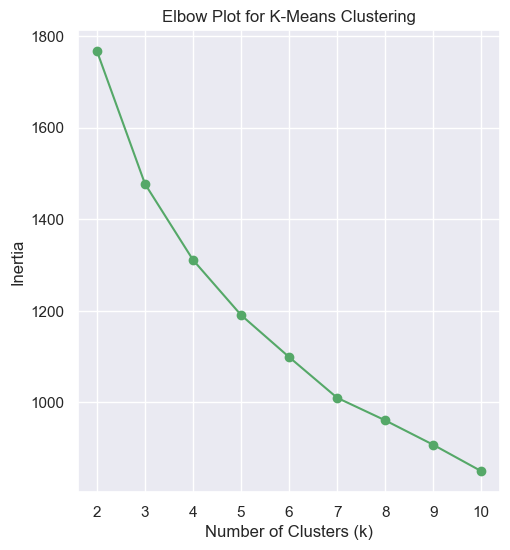

In [21]:
inertia = []
K_range = range(2, 11)  # Try different values of k= number of clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)  

# Plot Elbow plot to find optimal number of cluster
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'og-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for K-Means Clustering')


In [22]:
optimal_cluster= 4
print('The optimal cluster from elbow analysis:', optimal_cluster)
# Fit the model
kmeans = KMeans(n_clusters=4, random_state=50)
kmeans.fit(X_pca)

# Get cluster assignments for each data point
clusters_res = kmeans.labels_

# Get centroids of the clusters
c = kmeans.cluster_centers_

# Cluster prediction
y_km = kmeans.fit_predict(X_pca)

The optimal cluster from elbow analysis: 4


In [23]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(clusters_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=20,
                    alpha=0.7,
                    marker='o', 
                    cmap='viridis', 
                    edgecolor='k',
                    label=f'cluster {cluster}')
        
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=200,
                    label='centroids')
    
    plt.title(f'KMeans Clustering with {optimal_cluster} Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid()
    plt.show()

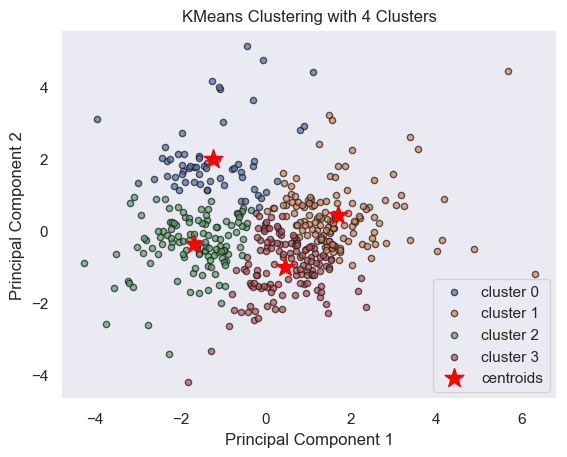

In [24]:
plot_clusters(X_pca, y_km, plt_cluster_centers= True)


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [25]:
# import pandas
import pandas as pd

# import Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# import scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

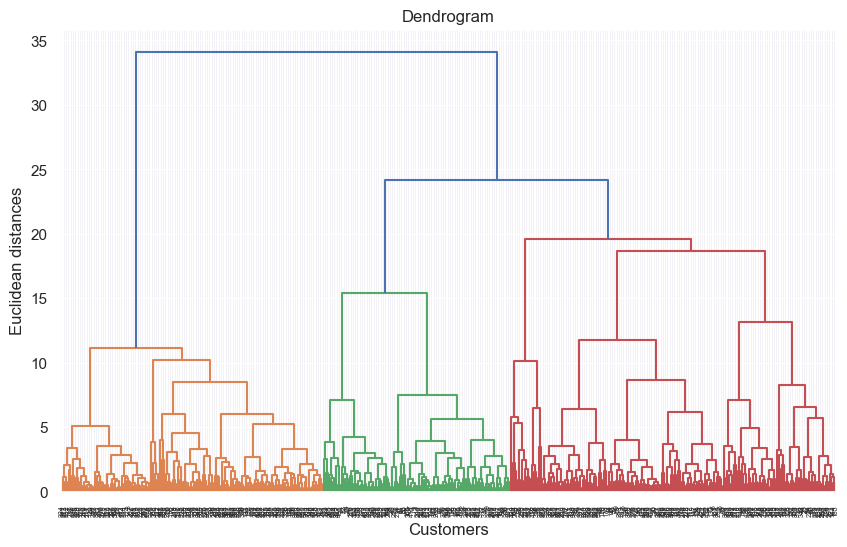

In [26]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_pca, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

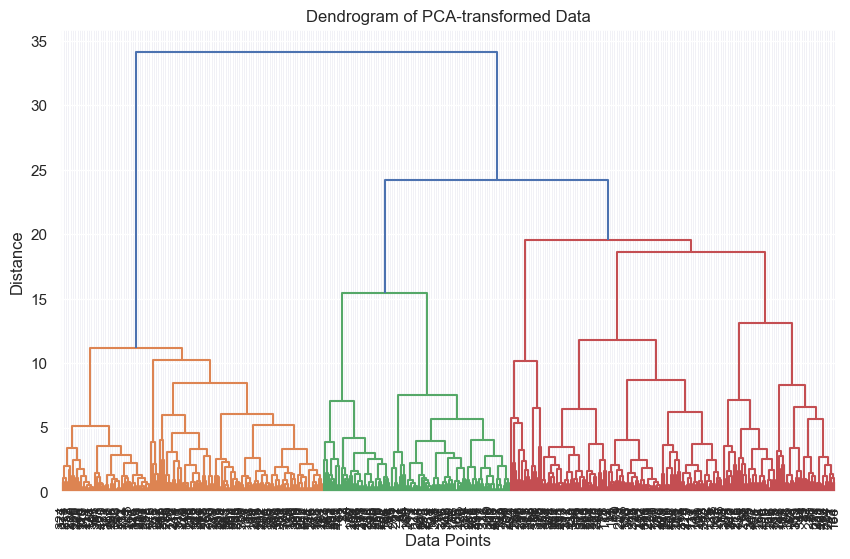

In [27]:
# Perform hierarchical clustering and compute linkage matrix
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
linkage_matrix = linkage(X_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, leaf_font_size=10 )
plt.title('Dendrogram of PCA-transformed Data')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [28]:
# Create a function to calculate the optimal number of clusters
def optimal_number_of_clusters(data, max_clusters):
    linkage_matrix = linkage(data, method='ward')
    last_merges = linkage_matrix[-max_clusters+1:, 2]
    diff = np.diff(last_merges, n=2)
    optimal_clusters = np.argmax(diff) + 2
    return optimal_clusters

In [29]:
n_optimal= optimal_number_of_clusters(X_pca, max_clusters=5 )
print('The optimal number of clusters:', n_optimal)

The optimal number of clusters: 3


In [30]:
# Create model
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

cluster_labels = fcluster(linkage_matrix, 3, criterion='maxclust')
y_hc= ac.fit_predict(X_pca)


In [31]:
def plot_hc_clusters(data, n_clusters):
    # Perform hierarchical clustering
    linkage_matrix = linkage(data, method='ward')
    
    # Assign data points to clusters
    cluster_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Hierarchical Clustering with {n_clusters} Clusters')
    plt.grid(True)
    plt.show()
    
   

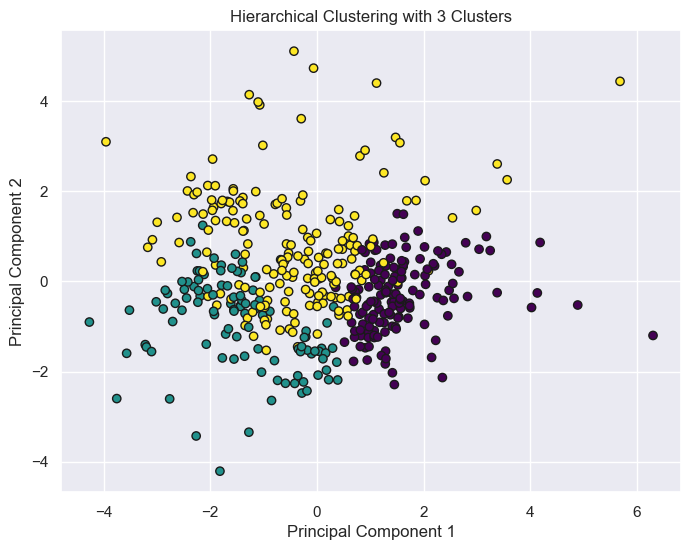

In [32]:
plot_hc_clusters(X_pca, 3)

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [33]:
#from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca_components = pca.fit_transform(X_std)


In [34]:
explained_var = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_var)

Explained Variance Ratio: [0.43990911 0.27127662 0.10756755 0.10144726 0.04906732 0.03073214]


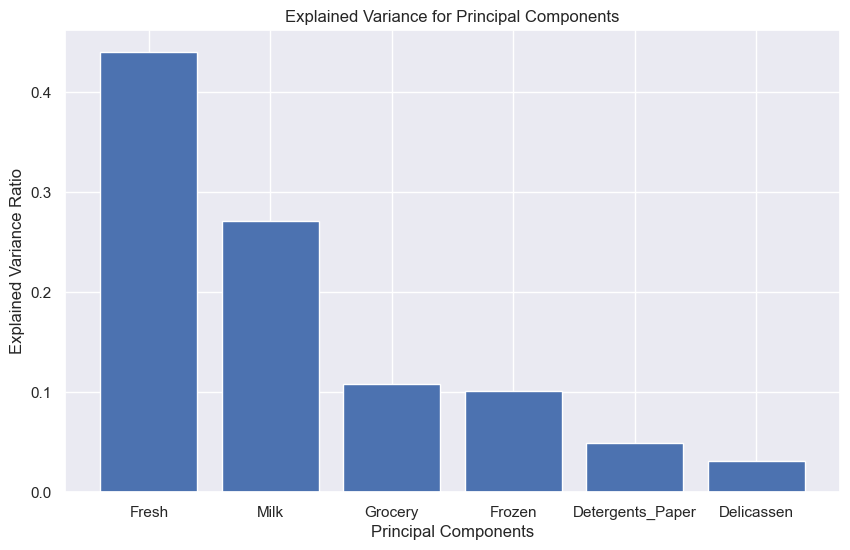

In [35]:
# Plot the explained variance for each component
plt.figure(figsize=(10, 6))
plt.bar(df_log.columns, explained_var)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance for Principal Components')
plt.show()

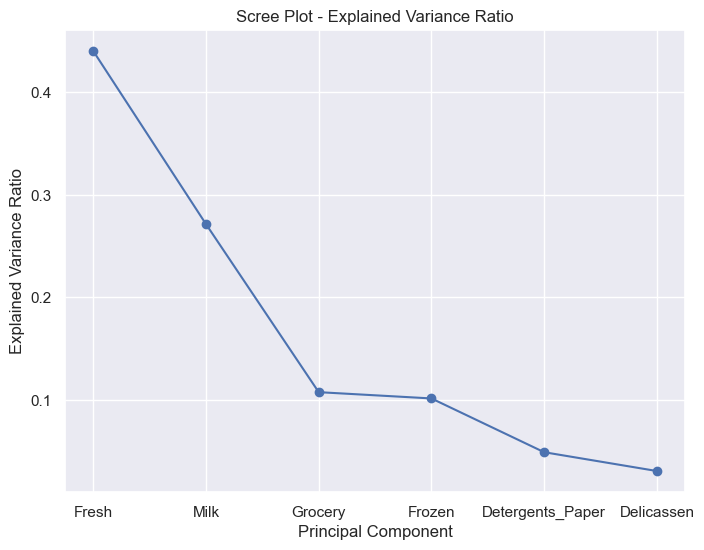

In [36]:
# Create a scree plot to visualize the explained variance
plt.figure(figsize=(8, 6))
plt.plot(df_log.columns, explained_var, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - Explained Variance Ratio')
plt.grid(True)
plt.show()

In [37]:
components = pd.DataFrame(pca.components_, columns=df_log.columns)


In [38]:
print("Principal Components:")
print(components)

Principal Components:
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.104627 -0.542274 -0.571694  0.138351         -0.551338   -0.212235
1 -0.590474 -0.133145  0.006282 -0.589535          0.068624   -0.530389
2  0.631894  0.076076  0.133450  0.033630          0.197258   -0.732852
3 -0.488525  0.061386  0.095672  0.791609          0.077347   -0.340286
4 -0.041160  0.761634 -0.098101 -0.074144         -0.618326   -0.144124
5 -0.027447  0.313958 -0.797835  0.005889          0.513904    0.002238


In [39]:
# Determine feature importance for each principal component
feature_importance = np.abs(components)
feature_importance_df = pd.DataFrame(feature_importance, columns=df_log.columns)

# Sort the features based on importance for each principal component
sorted_features = feature_importance_df.apply(lambda x: x.sort_values(ascending=False).index)

In [40]:
sorted_features

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,4,5,3,4,2
1,1,0,0,1,0,1
2,3,5,2,0,5,3
3,0,1,4,4,2,0
4,4,2,3,2,3,4
5,5,3,1,5,1,5


In [44]:
feature_weights = feature_importance.iloc[0, sorted_features.iloc[0]]
feature_weights


Grocery             0.571694
Detergents_Paper    0.551338
Delicassen          0.212235
Frozen              0.138351
Detergents_Paper    0.551338
Grocery             0.571694
Name: 0, dtype: float64

In [42]:
range(len(pca.components_))

range(0, 6)

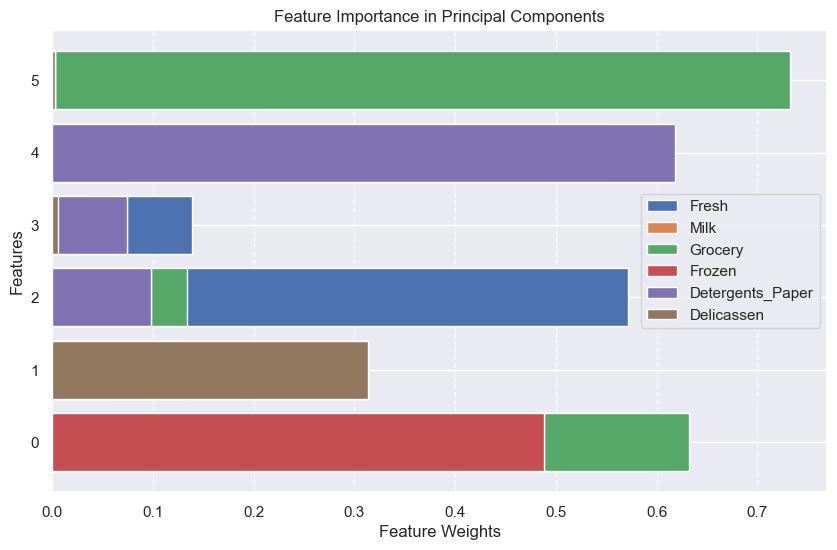

In [43]:
# Visualize the sorted features for each principal component
plt.figure(figsize=(10, 6))
for i in range(len(pca.components_)):
    feature_weights = feature_importance.iloc[i, sorted_features.iloc[i]]
    plt.barh(sorted_features.iloc[i], feature_weights, label=f'PC {i+1}')

plt.xlabel('Feature Weights')
plt.ylabel('Features')
plt.title('Feature Importance in Principal Components')
plt.legend(df_log.columns)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.